<a href="https://colab.research.google.com/github/Kommandjsdf/MachineLearning/blob/main/linear_regression_with_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

data = {
    "Days" : [1, 2, 3, 4, 5],
    "Coins" : [2, 5, 6, 8, 15]
}

df = pd.DataFrame(data)
df.head()

,Days,Coins
0,1,2
1,2,5
2,3,6
3,4,8
4,5,15


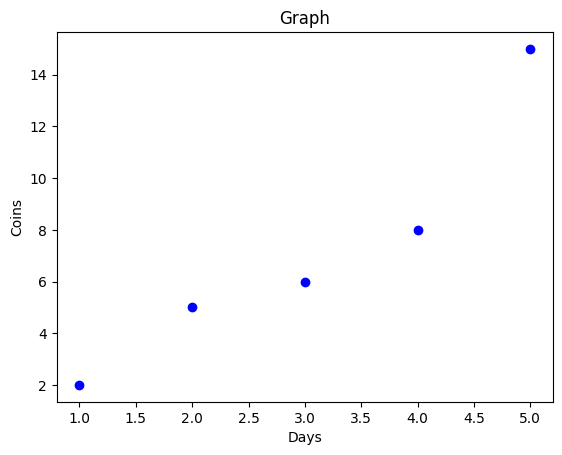

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df["Days"], df["Coins"], color="blue")

plt.title("Graph")
plt.xlabel("Days")
plt.ylabel("Coins")

plt.show()

In [6]:
# sklearn -> scikit-learn
from sklearn.linear_model import LinearRegression

X = df[["Days"]]
Y = df["Coins"]

model = LinearRegression()
model.fit(X, Y)

print(f"W: {model.coef_}")
print(f"b: {model.intercept_}")


W: [2.9]
b: -1.5000000000000009


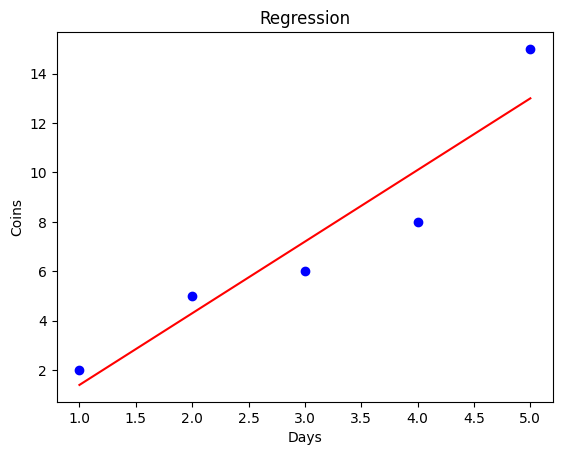

In [7]:
Y_pred = model.predict(X)

plt.scatter(X, Y, color="blue")
plt.plot(X, Y_pred, color="red")
plt.title("Regression")
plt.xlabel("Days")
plt.ylabel("Coins")
plt.show()

In [8]:
new_value = [[10]]
predicted_coins = model.predict(new_value)

print(f"Prediction for {new_value[0][0]}th day: {predicted_coins[0]:.2f} coins")

Prediction for 10th day: 27.50 coins


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
day = {
    "Days": [],
    "Coins": []
}

print("Enter the day, and then the amount of coins (leave empty when finished):")

result = "0 0"
while True:
  result = input("")
  if result == "":
    break
  result_split = result.split(' ')
  if len(result_split) != 2:
    print("Write it in a (day coins) format, with just a space")
    continue
  day_number = result_split[0]
  coins = result_split[1]
  try:
    day_number = int(day_number)
    coins = int(coins)
  except ValueError:
    print("Write it in a (day coins) format, with just a space")
    continue
  day["Days"].append(day_number)
  day["Coins"].append(coins)

df = pd.DataFrame(day)

new_value = [[]]

def ask_for_day():
  day_to_predict = input("What day to predict: ")
  try:
    day_to_predict = int(day_to_predict)
    return day_to_predict
  except TypeError:
    print("Not a number, try again!")
    return ask_for_day()

new_value[0].append(ask_for_day())
model_inp = LinearRegression()
model_inp.fit(df[["Days"]], df["Coins"])
predicted_coins = model_inp.predict(new_value)

print(f"Prediction for {new_value[0][0]}th day: {predicted_coins[0]:.2f} coins")

Enter the day, and then the amount of coins (leave empty when finished):
1 7
2 18
3 20
4 40
5 43
6 44

What day to predict: 7
Prediction for 7th day: 56.67 coins


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


LinearRegression з генерацією та шумом

In [39]:
import numpy as np
import pandas as pd

np.random.seed(42)
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
energy_usage = np.random.normal(0, 5, len(hours)) + 10 * hours + 15

print(energy_usage)

[ 27.48357077  34.30867849  48.23844269  62.61514928  63.82923313
  73.82931522  92.89606408  98.83717365 102.65262807]


In [40]:
from sklearn.linear_model import LinearRegression

X = hours.reshape(-1, 1)
print(X)
Y = energy_usage
print(Y)

model = LinearRegression()
model.fit(X, Y)

print(f"Weight (W): {model.coef_}")
print(f"Shift (B): {model.intercept_}")

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 27.48357077  34.30867849  48.23844269  62.61514928  63.82923313
  73.82931522  92.89606408  98.83717365 102.65262807]
Weight (W): [9.91318539]
Shift (B): 17.621879203288223


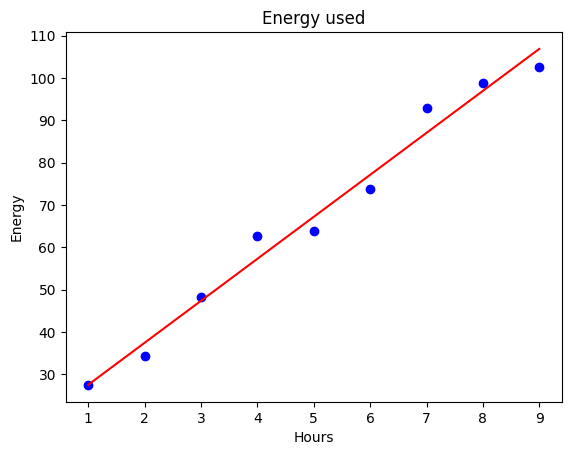

In [41]:
import matplotlib.pyplot as plt

Y_pred = model.predict(X)

plt.scatter(X, Y, color="blue")
plt.plot(X, Y_pred, color="red")
plt.title("Energy used")
plt.xlabel("Hours")
plt.ylabel("Energy")
plt.show()

In [42]:
new_value = [[10]]
predicted_energy = model.predict(new_value)
print(f"On the {new_value[0][0]}th hour, {predicted_energy[0]} energy will be wasted")

On the 10th hour, 116.75373310049136 energy will be wasted
